In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
con = sqlite3.connect('baseline_v3.2_10yrs.db')
df = pd.read_sql('select night, filter from observations;', con)
con.close()

In [3]:
night = df['night'].values
filter = df['filter'].values

In [4]:
changes = []
for un in np.unique(night):
    in_night = np.where(night == un)[0]
    changes.append(np.where(filter[in_night][1:] != filter[in_night][:-1])[0].size)

In [5]:
np.median(changes)

14.0

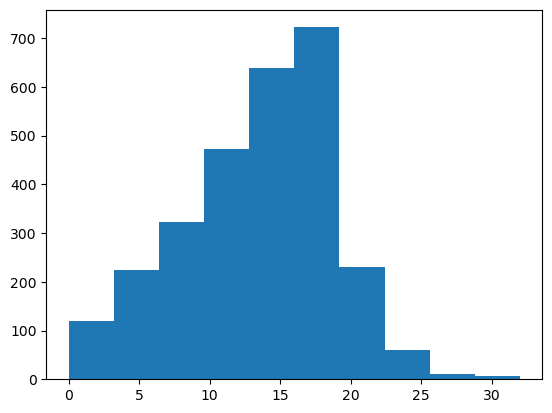

In [6]:
_ack = plt.hist(changes)

In [7]:
38400/2809

13.670345318618725

In [8]:
39564/2809


14.084727661089355

In [9]:
from rubin_sim.maf.batches import filtersPerNight
from rubin_sim import maf

In [10]:
fpn = filtersPerNight()

In [11]:
fpn

{'opsim_Filter_Changes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x142099010>,
 'opsim_Minimum_time_between_filter_changes_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x1417a9690>,
 'opsim_Number_of_filter_changes_faster_than_lt10_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x14227e050>,
 'opsim_Number_of_filter_changes_faster_than_lt20_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x14227f710>,
 'opsim_Max_number_of_filter_changes_within_10_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x14227f8d0>,
 'opsim_Max_number_of_filter_changes_within_20_0_minutes_Per_Night_ONED': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x14227fad0>}

In [12]:
bg = maf.metricBundles.MetricBundleGroup(fpn, 'baseline_v3.2_10yrs.db', out_dir='temp', results_db=None)
bg.run_all()


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/slicers/one_d_slicer.py:102: UserWarning: Warning: this OneDSlicer was already set up once. Re-setting up a OneDSlicer is unpredictable; at the very least, it will change the mapping of the simulated data into the data slices. A safer choice is to use a separate OneDSlicer for each MetricBundle.
  warnings.warn(warning_msg)


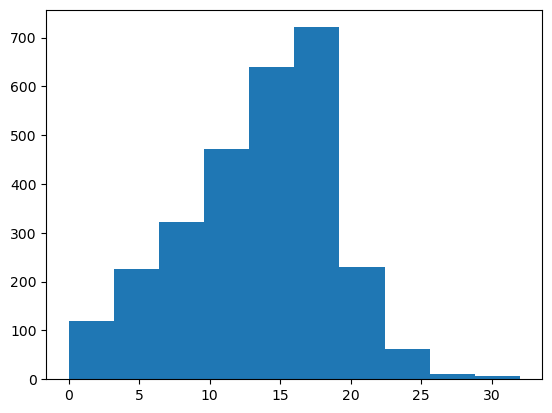

In [13]:
ack = plt.hist(fpn['opsim_Filter_Changes_Per_Night_ONED'].metric_values[~fpn['opsim_Filter_Changes_Per_Night_ONED'].metric_values.mask])

In [14]:
fpn['opsim_Filter_Changes_Per_Night_ONED'].metric_values

masked_array(data=[12.0, 16.0, 15.0, ..., 8.0, 4.0, 15.0],
             mask=[False, False, False, ..., False, False, False],
       fill_value=0.0)

In [15]:
np.where(fpn['opsim_Filter_Changes_Per_Night_ONED'].metric_values.mask)

(array([  14,   18,   23,   24,   25,   28,   29,   30,   31,   35,   38,
          39,   40,   41,   42,   43,   44,   51,   55,   63,   64,   73,
          84,   89,   92,   95,   96,   97,   98,   99,  103,  118,  132,
         145,  146,  147,  148,  149,  150,  151,  172,  186,  187,  188,
         189,  190,  191,  192,  193,  239,  240,  241,  265,  288,  289,
         296,  297,  353,  371,  373,  380,  382,  384,  388,  389,  393,
         400,  403,  404,  405,  406,  407,  408,  409,  411,  412,  424,
         432,  439,  444,  446,  449,  450,  451,  453,  454,  455,  457,
         458,  459,  460,  462,  463,  464,  465,  467,  469,  483,  500,
         502,  509,  510,  512,  513,  514,  516,  521,  522,  523,  524,
         525,  527,  528,  529,  535,  548,  552,  553,  554,  555,  556,
         557,  558,  562,  565,  595,  596,  597,  598,  663,  691,  706,
         707,  708,  724,  725,  732,  735,  736,  737,  738,  740,  767,
         768,  769,  770,  771,  772, 